# Stroke Prediction using Advanced Classification Techniques

<a id="table_of_contents"></a>
## Table of Contents
1. <a href="#download" style="text-decoration: None">Download Data</a>
2. <a href="#import" style="text-decoration: None">Import Libraries and Dataset</a>
3. <a href="#preview" style="text-decoration: None">Dataset Preview</a>
    - <a href="#cleaning" style="text-decoration: None">Data Cleaning</a>
4. <a href="#eda" style="text-decoration: None">Exploratory Data Analysis</a>
    - <a href="#univariate" style="text-decoration: None">Univariate Analysis</a>
    - <a href="#bivariate" style="text-decoration: None">Bivariate Analysis</a>
5. <a href="#preprocessing" style="text-decoration: None">Data Preparation and Preprocessing</a>
    - <a href="#input_target" style="text-decoration: None">Identify Inputs and Target Columns</a>
    - <a href="#encode" style="text-decoration: None">Encode Categorical Columns</a>
    - <a href="#split_data" style="text-decoration: None">Split Dataset into Training and Validation Set</a>
6. <a href="#baseline" style="text-decoration: None">Baseline Models</a>
7. <a href="#voting_clf" style="text-decoration: None">Voting Classifier: Hard and Soft Voting</a>
8. <a href="#performance_comparision" style="text-decoration: None">Model Performance: Confusion Matrix, AUC-ROC Curve, Precision-Recall Curve</a>
    - <a href="#confusion_matrix" style="text-decoration: None">Confusion Matrices</a>
    - <a href="#auc_roc" style="text-decoration: None">AUC-ROC Curve</a>
    - <a href="#precision_recall" style="text-decoration: None">Precision-Recall</a>
9. <a href="#save_model" style="text-decoration: None">Retrain and Save Model</a>

<a id="download"></a>
## 1. Download Data
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

I have downloaded the dataset directly within the Jupyter notebook using the opendatasets library. The dataset description can be found <a href="https://www.kaggle.com/competitions/playground-series-s3e2/data" style="text-decoration: None">here</a>.

In [1]:
import os 
import opendatasets as od

In [2]:
od.download("https://www.kaggle.com/competitions/playground-series-s3e2/")

Skipping, found downloaded files in ".\playground-series-s3e2" (use force=True to force download)


In [3]:
os.listdir("playground-series-s3e2")

['sample_submission.csv', 'test.csv', 'train.csv']

<a id="import"></a>
## 2. Import Libraries and Dataset
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [4]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings 
warnings.filterwarnings("ignore")

In [5]:
train_df = pd.read_csv("playground-series-s3e2/train.csv")
test_df = pd.read_csv("playground-series-s3e2/test.csv")
sub_df = pd.read_csv("playground-series-s3e2/sample_submission.csv")

<a id="preview"></a>
## 3. Dataset Preview
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [6]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.00,0,0,Yes,Private,Urban,79.53,31.10,never smoked,0
1,1,Male,33.00,0,0,Yes,Private,Rural,78.44,23.90,formerly smoked,0
2,2,Female,42.00,0,0,Yes,Private,Rural,103.00,40.30,Unknown,0
3,3,Male,56.00,0,0,Yes,Private,Urban,64.87,28.80,never smoked,0
4,4,Female,24.00,0,0,No,Private,Rural,73.36,28.80,never smoked,0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15304.00,7651.50,4418.03,0.00,3825.75,7651.50,11477.25,15303.00
age,15304.00,41.42,21.44,0.08,26.00,43.00,57.00,82.00
hypertension,15304.00,0.05,0.22,0.00,0.00,0.00,0.00,1.00
heart_disease,15304.00,0.02,0.15,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,15304.00,89.04,25.48,55.22,74.90,85.12,96.98,267.60
bmi,15304.00,28.11,6.72,10.30,23.50,27.60,32.00,80.10
stroke,15304.00,0.04,0.20,0.00,0.00,0.00,0.00,1.00


In [9]:
train_df.nunique()

id                   15304
gender                   3
age                    106
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level     3740
bmi                    407
smoking_status           4
stroke                   2
dtype: int64

In [10]:
train_df.duplicated().sum()

0

<a id="cleaning"></a>
### 3.1 Exploratory Cleaning
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [11]:
sorted(train_df['age'].unique().tolist())[:10]

[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.68, 0.72]

In [12]:
train_df['age'] = np.ceil(train_df['age'])
test_df['age'] = np.ceil(test_df['age'])

In [13]:
train_df['gender'].value_counts()

Female    9446
Male      5857
Other        1
Name: gender, dtype: int64

In [14]:
train_df.drop(train_df[train_df['gender'] == 'Other'].index, inplace=True)
test_df.drop(train_df[train_df['gender'] == 'Other'].index, inplace=True)

<a id="eda"></a>
## 4. Exploratory Data Analysis
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
sns.set_style("darkgrid")

In [16]:
# plot_color = ['lightcoral','#008080']
plot_color = ['#008080', 'black']
sns.set_palette(['#008080', 'black'])

In [17]:
def custom_histogram(column: str, titles: list) -> go.Figure:
    """create a barplot for visualizing a column distribution and 
       its relationship between the target column 
       
       column: plot column name -> str
       
       titles: A list of the plot and x-axes title respectively -> list       
    """
    
    # Create subplots
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['No Stroke', 'Stroke'])

    # Add histograms to subplots
    histogram_no_stroke = px.histogram(no_stroke_data, 
                                       x=column, 
                                       color_discrete_sequence=['#008080'])
    histogram_stroke = px.histogram(stroke_data, 
                                    x=column,
                                    color_discrete_sequence=['black'])

    fig.add_trace(histogram_no_stroke['data'][0], row=1, col=1)
    fig.add_trace(histogram_stroke['data'][0], row=1, col=2)

    # Update layout
    fig.update_layout(title=titles[0], title_x=0.5)
    fig.update_xaxes(title_text=titles[1])
    fig.update_yaxes(title_text='Count')

    return fig

In [18]:
# Filter data for stroke and no-stroke cases
no_stroke_data = train_df[train_df['stroke'] == 0]
stroke_data = train_df[train_df['stroke'] == 1]

<a id="univariate"></a>
### 4.1 Univariate Analysis

### `stroke`
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [19]:
stroke_count = train_df['stroke'].value_counts()
stroke_count

0    14671
1      632
Name: stroke, dtype: int64

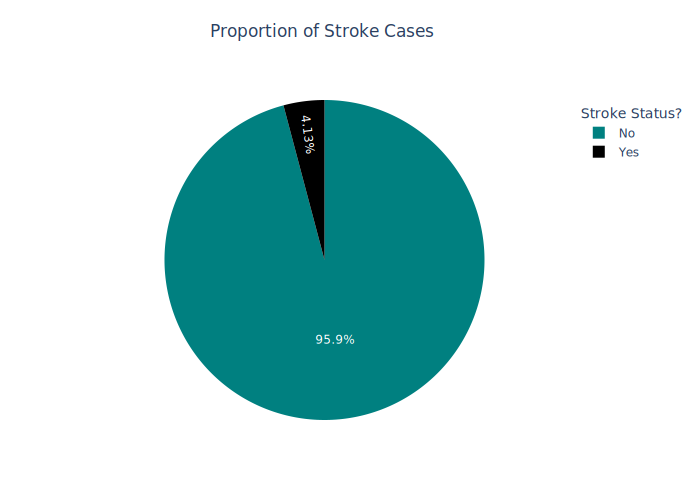

In [20]:
fig = px.pie(
    stroke_count, values=stroke_count.values, names=['No', 'Yes'],
    title='Proportion of Stroke Cases',
    color_discrete_sequence=plot_color,
)

fig.update_layout(legend_title_text='Stroke Status?', title_x=0.3, title_y=0.95,)
fig.show('svg')

<a id="bivariate"></a>
### 4.1 Bivariate Analysis

### `avg_glucose_level`
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

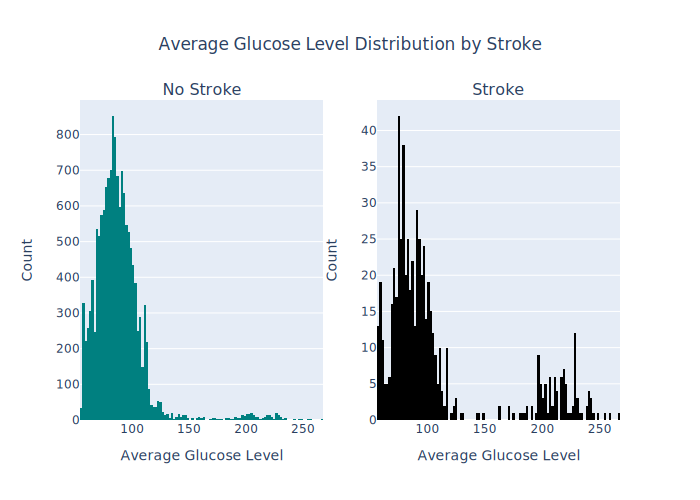

In [21]:
fig = custom_histogram('avg_glucose_level', ['Average Glucose Level Distribution by Stroke', 'Average Glucose Level'])
fig.show('svg')

I cannot infer that people with high average glucose level are more prone to stroke due to some data observed on the right tail of the second plot. Probably, people in this category have some other kinds of ailment or correlating factor. Also, similar category of people (high glucose level) in the first plot are not stroke positive. 

### `age`
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

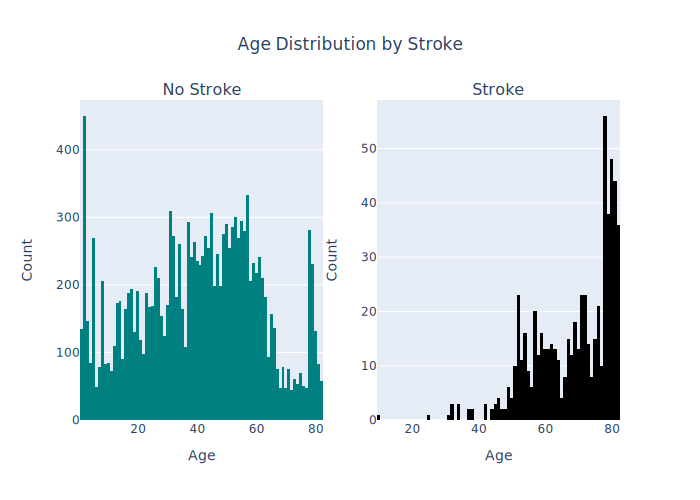

In [22]:
fig = custom_histogram('age', ['Age Distribution by Stroke', 'Age'])
fig.show('svg')

### `bmi`
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [23]:
stroke_data['bmi'].mean()

30.230696202531643

In [24]:
no_stroke_data['bmi'].mean()

28.02217163110899

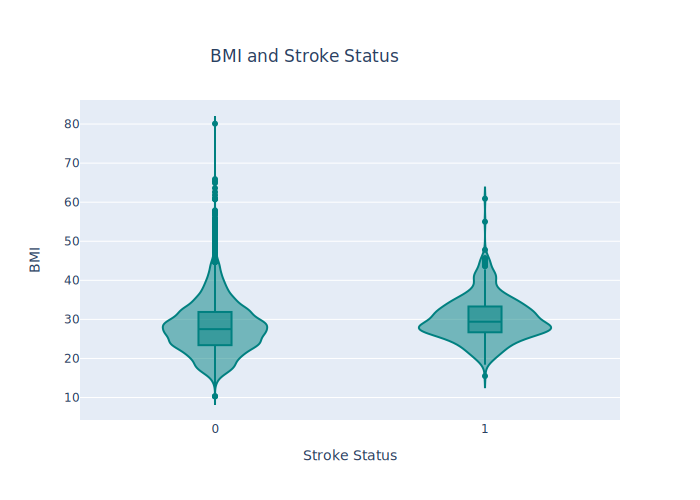

In [25]:
fig = px.violin(train_df, y='bmi', x='stroke', 
                box=True, width=700, height=500, color_discrete_sequence=plot_color,
                title='BMI and Stroke Status',
                labels={'stroke': 'Stroke Status', 'bmi': 'BMI'})

fig.update_layout(title_x=0.3, title_y=0.9)
fig.show('svg')

Both classes seem to have roughly the same mean of 29. Also, a fairly large proportion of people who are stroke positive have a BMI of around 27 - 33.  

### `smoking_status`

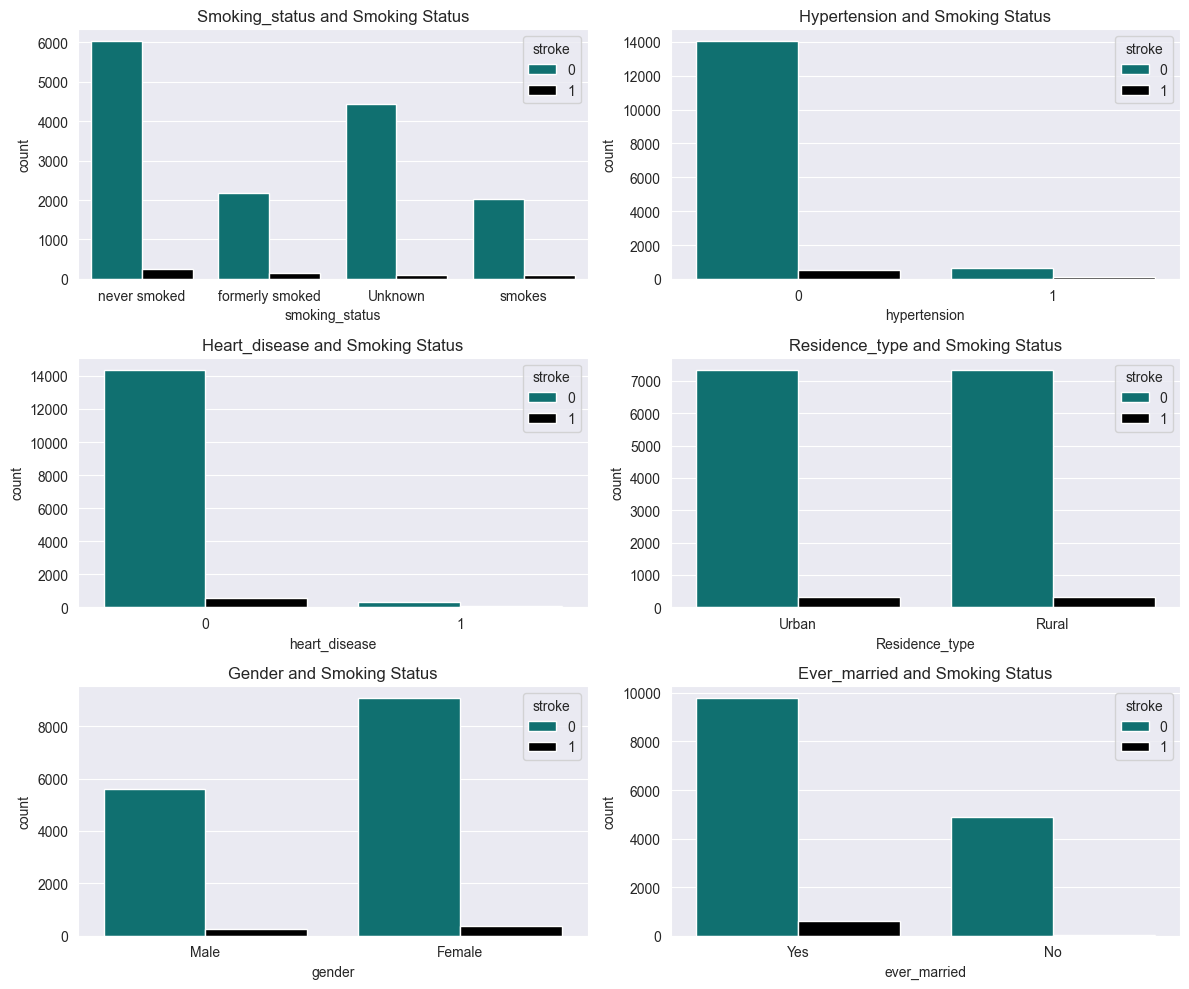

In [26]:
# List of x values
x_values = ['smoking_status', 'hypertension', 'heart_disease', 'Residence_type', 'gender', 'ever_married']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Loop through the x values and create subplots
for ax, x_value in zip(axes.flat, x_values):
    sns.countplot(data=train_df, x=x_value, hue='stroke', ax=ax)
    ax.set_title(f'{x_value.capitalize()} and Smoking Status')

# Adjust layout
plt.tight_layout()
# plt.subplots_adjust(top=0.8)

# Show the plot
plt.show()

<a id="preprocessing"></a>
## 5. Data Preparation and Preprocessing
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [27]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn import set_config
set_config(display='diagram')

<a id="input_target"></a>
### 5.1. Identify Input and Target Column
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [28]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [29]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'stroke'

In [30]:
input_cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [31]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

test_inputs = test_df[input_cols].copy()

<a id="encode"></a>
### 5.2. Encode Categorical Columns
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [32]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()
numeric_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [33]:
categorical_cols = train_inputs.select_dtypes(include='object').columns.to_list()
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [34]:
# Remove smoking_status from categorical columns
categorical_cols.remove('smoking_status')

In [35]:
ordinal_enc = OrdinalEncoder(categories=[['Unknown', 'never smoked', 'formerly smoked', 'smokes']])

In [36]:
onehot_enc = OneHotEncoder(handle_unknown='ignore')

In [37]:
preprocessor = ColumnTransformer(
    [
        ('Ordinal_Encode', ordinal_enc, ['smoking_status']), # Ordinal Encode smoking_status
        ('OneHot_Encode', onehot_enc, categorical_cols)
    ]
)

In [38]:
preprocessor.fit(train_inputs)

ColumnTransformer(transformers=[('Ordinal_Encode',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'never smoked',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('OneHot_Encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type'])])

In [39]:
encoded_cols = list(preprocessor.get_feature_names_out())
print(encoded_cols[:3])

['Ordinal_Encode__smoking_status', 'OneHot_Encode__gender_Female', 'OneHot_Encode__gender_Male']


In [40]:
train_inputs[encoded_cols] = preprocessor.transform(train_inputs)
test_inputs[encoded_cols] = preprocessor.transform(test_inputs)

In [41]:
X_train = train_inputs[numeric_cols + encoded_cols]
y_train = train_df[target_col]

X_test = test_inputs[numeric_cols + encoded_cols]

In [42]:
X_train.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,Ordinal_Encode__smoking_status,OneHot_Encode__gender_Female,OneHot_Encode__gender_Male,OneHot_Encode__ever_married_No,OneHot_Encode__ever_married_Yes,OneHot_Encode__work_type_Govt_job,OneHot_Encode__work_type_Never_worked,OneHot_Encode__work_type_Private,OneHot_Encode__work_type_Self-employed,OneHot_Encode__work_type_children,OneHot_Encode__Residence_type_Rural,OneHot_Encode__Residence_type_Urban
0,28.00,0,0,79.53,31.10,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1,33.00,0,0,78.44,23.90,2.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
2,42.00,0,0,103.00,40.30,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00


In [43]:
assert X_train.shape[1] == X_test.shape[1]

<a id="split_data"></a>
### 5.3. Split Dataset into Training and Validation Set
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f'Shape of training set: {X_train.shape}')
print(f'Shape of validation set: {X_val.shape}')

Shape of training set: (12242, 17)
Shape of validation set: (3061, 17)


<a id="baseline"></a>
## 6. Baseline Models
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [47]:
models = [
    (LogisticRegression(), 'Logistic Regression'),
    (RandomForestClassifier(), 'Random Forest'),
    (XGBClassifier(), 'XGBoost'),
    (LGBMClassifier(verbose=-1), 'LightGBM')
]

In [48]:
confusion_matrices = {}

def evaluate_model(model, X_train, y_train, X_val, y_val):
    y_pred = model.predict(X_val)
    confusion_mat = confusion_matrix(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return confusion_mat, accuracy, precision, recall, f1

def metric_df(model, model_name):
    confusion_mat, *df = evaluate_model(model, X_train, y_train, X_val, y_val)
    confusion_matrices[model_name] = confusion_mat
    df = [df]
    model_metrics = pd.DataFrame(data=df, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    model_metrics.insert(0, 'Model', model_name)
    return model_metrics

In [49]:
predictions = []

for model, model_name in models:
    model.fit(X_train, y_train)
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)

In [50]:
# Perform SMOTE oversampling
oversample = SMOTE()
X_train_ns, y_train_ns = oversample.fit_resample(X_train, y_train)

In [51]:
# Train and evaluate Logistic Regression with SMOTE data
lr_with_smote = LogisticRegression()
lr_with_smote.fit(X_train_ns, y_train_ns)
lr_with_smote_metrics = metric_df(lr_with_smote, 'Logistic Regression with SMOTE')
predictions.append(lr_with_smote_metrics)

In [52]:
# Display confusion matrices
for model_name, confusion_mat in confusion_matrices.items():
    print(f'Confusion Matrix for {model_name}:')
    print(confusion_mat)
    print()

Confusion Matrix for Logistic Regression:
[[2920    7]
 [ 130    4]]

Confusion Matrix for Random Forest:
[[2913   14]
 [ 128    6]]

Confusion Matrix for XGBoost:
[[2902   25]
 [ 123   11]]

Confusion Matrix for LightGBM:
[[2914   13]
 [ 126    8]]

Confusion Matrix for Logistic Regression with SMOTE:
[[2323  604]
 [  32  102]]



<a id="voting_clf"></a>
## 7. Voting Classifier: Hard and Soft Voting
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [53]:
from sklearn.ensemble import VotingClassifier

In [54]:
estimator = []
estimator.append(('LogisticRegression', LogisticRegression()))
estimator.append(('RandomForest', RandomForestClassifier()))
estimator.append(('XGBoost', XGBClassifier()))
estimator.append(('LightGBM', LGBMClassifier(verbose=-1)))

In [55]:
VC_hard = VotingClassifier(estimators=estimator, voting ='hard')
VC_hard.fit(X_train, y_train)
VC_hard_metrics = metric_df(VC_hard, 'VC Hard')
predictions.append(VC_hard_metrics)

In [56]:
VC_hard_metrics

,Model,Accuracy,Precision,Recall,F1 Score
0,VC Hard,0.96,0.33,0.01,0.03


In [57]:
VC_soft = VotingClassifier(estimators=estimator, voting ='soft')
VC_soft.fit(X_train, y_train)
VC_soft_metrics = metric_df(VC_soft, 'VC Soft')
predictions.append(VC_soft_metrics)

In [58]:
VC_soft_metrics

,Model,Accuracy,Precision,Recall,F1 Score
0,VC Soft,0.95,0.31,0.03,0.05


<a id="performance_comparision"></a>
## 8. Performance Comparison: Confusion Matrix, AUC-ROC Curve, Precision-Recall Curve
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [59]:
predictions_base = pd.concat(predictions, ignore_index=True, sort=False)
predictions_base = predictions_base.sort_values(by=['Recall'], ascending=False).style.hide(axis='index')

predictions_base

Model,Accuracy,Precision,Recall,F1 Score
Logistic Regression with SMOTE,0.792225,0.144476,0.761194,0.242857
XGBoost,0.951650,0.305556,0.082090,0.129412
LightGBM,0.954590,0.380952,0.059701,0.103226
Random Forest,0.953610,0.300000,0.044776,0.077922
Logistic Regression,0.955243,0.363636,0.029851,0.055172
VC Soft,0.954590,0.307692,0.029851,0.054422
VC Hard,0.955570,0.333333,0.014925,0.028571


<a id="confusion_matrix"></a>
### 8.1. Confusion Matrix
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [60]:
models_to_plot = [
    'Logistic Regression',
    'XGBoost',
    'LightGBM',
    'Logistic Regression with SMOTE'
]

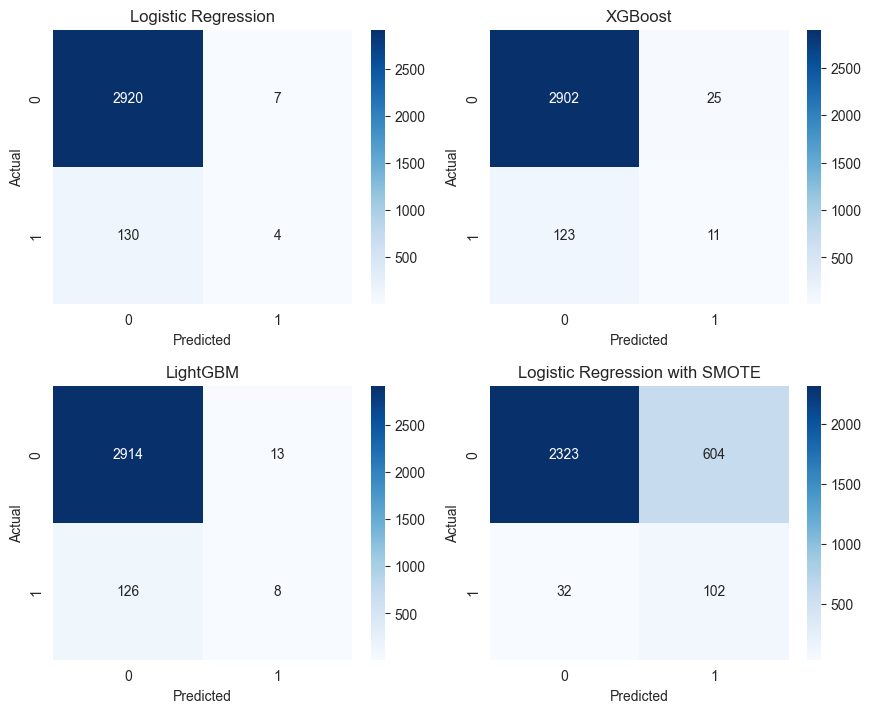

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))

# Loop through models and plot confusion matrices
for ax, model_name in zip(axes.ravel(), models_to_plot):
    confusion_mat = confusion_matrices[model_name]
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(left=0, right=0.9, top=0.9, bottom=0)
plt.show()

In this instance, a higher number of FN means the model fails to identify someone as having a stroke when they actually did have a stroke while FP means the model incorrectly identifies someone as having a stroke when they did not actually have a stroke. Choosing precision as my primary evaluation metric means that I want to avoid FP as much as possible and choosing recall means I want to avoid FN as much as possible. For this task, I have considered False Negatives as more costly and potentially dangerous. Hence, recall is chosen as the evaluation metric.


The logistic regression model with SMOTE sampling seemed to be a good model in terms of our chosen metric - less False Negatives. However, this is achieved at the expense of precision.

<a id="auc_roc"></a>
### 8.2. AUC-ROC Curve
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [63]:
# Get predicted probabilities for the positive class (stroke)
y_pred_prob = lr_with_smote.predict_proba(X_val)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_prob)

# Calculate AUC
roc_auc = roc_auc_score(y_val, y_pred_prob)

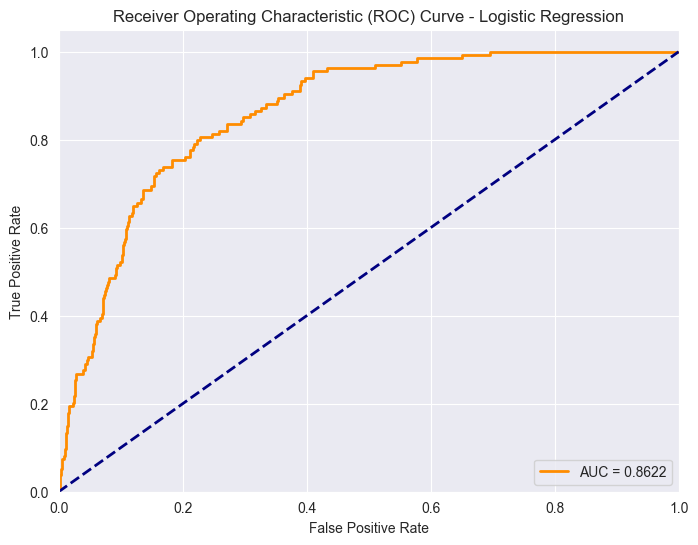

In [64]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

<a id="precision_recall"></a>
### 8.3. Precision-Recall Curve
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [65]:
from sklearn.metrics import PrecisionRecallDisplay

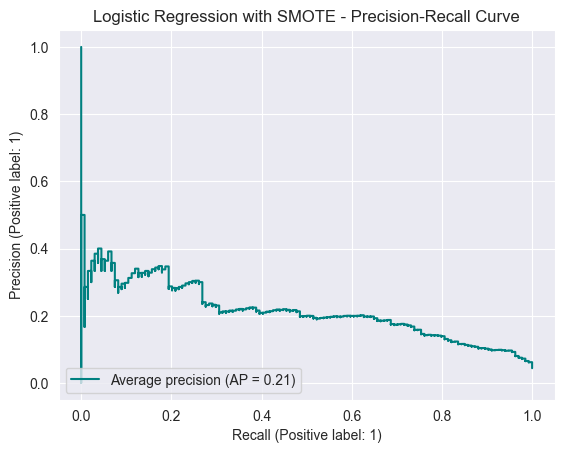

In [66]:
# Create Precision-Recall display using PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    lr_with_smote, X_val, y_val, name="Average precision")

# Set title
display.ax_.set_title("Logistic Regression with SMOTE - Precision-Recall Curve")

# Show the plot
plt.show()

<a id="save_model"></a>
## 9. Retrain and Save Model
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [67]:
X_train = train_inputs[numeric_cols + encoded_cols]
y_train = train_df[target_col]

In [68]:
preds = lr_with_smote.predict(X_test)

In [69]:
len(preds)

10204

In [70]:
sub_df

,id,stroke
0,15304,0.04
1,15305,0.04
2,15306,0.04
3,15307,0.04
4,15308,0.04
...,...,...
10199,25503,0.04
10200,25504,0.04
10201,25505,0.04
10202,25506,0.04


In [ ]:
sub_df = preds

In [71]:
sub_df.to_csv('submission.csv', index=None)

### 9.1. Make prediction on a single input
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [72]:
sub_df['stroke'] = preds

In [73]:
single_input = {
    'gender':  'Male',
    'age': 33,
    'hypertension': 0,
    'heart_disease': 0,
    'ever_married': 'Yes',
    'work_type': 'Private',
    'Residence_type': 'Urban',
    'avg_glucose_level': 79.53,
    'bmi': 31.10,
    'smoking_status': 'never smoked',
}

In [74]:
input_df = pd.DataFrame([single_input])

input_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,33,0,0,Yes,Private,Urban,79.53,31.10,never smoked


In [75]:
input_df[encoded_cols] = preprocessor.transform(input_df)

In [76]:
X = input_df[numeric_cols + encoded_cols]

In [77]:
lr_with_smote.predict(X)

array([0], dtype=int64)

### 9.2. Save Model
<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [78]:
import joblib

In [79]:
model = {
    'encoded_cols': encoded_cols,
    'numeric_cols': numeric_cols,
    'preprocessor': preprocessor,
    'model': lr_with_smote
}

In [80]:
joblib.dump(model, 'stroke_model.joblib')

['stroke_model.joblib']